## Agent 1 Practice

In [1]:
from typing import TypedDict, Dict
from langgraph.graph import (StateGraph, # the framework that helps us to design and manage the flow in out application environment using lang graphs
                             START, # to set the start node
                             END    # to set the end/finish node
                             )

from IPython.display import Image, display

import math

In [2]:
# Now we create AgentState that will be our shared data structure to keep track of the information as our application runs

class AgentState( TypedDict ):
    message : str


def greeting_node(state : AgentState ) -> AgentState :
    """ Simple note that adds a greeting message """
    state["message"] = f"Hi {state['message']}, How is your day going so far?"
    return state



In [3]:
graph = StateGraph(state_schema = AgentState)

graph.add_node(node = "greeter", action = greeting_node)

graph.set_entry_point(key = "greeter")
graph.set_finish_point(key = "greeter")

app = graph.compile()


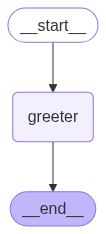

In [4]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [5]:
result = app.invoke({"message":"Bob"})
result["message"]

'Hi Bob, How is your day going so far?'

## Agent 1 Exercise

### Our task: Create a Personalized Compliment Agent using LangGraph!

**Input:** {"name": "Neil"}  
**Output:** "Neil, you're doing an amazing job learning LangGraph!"

*Hint: You have to concatenate the state, not replace it*

In [6]:
class AgentState(TypedDict):
    name: str


def compliment_node(state: AgentState) -> AgentState:
    """ Simple node that adds a compliment message with name"""
    state["name"] = f"Hi {state['name']}, you're doing an amazing job learning LangGraph!"
    return state



In [7]:
graph = StateGraph(state_schema=AgentState) # we create a new graph for the complimenter application

graph.add_node(node="complimenter", action=compliment_node)
graph.set_entry_point(key="complimenter")
graph.set_finish_point(key="complimenter")
app = graph.compile()

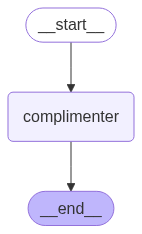

In [8]:
display(Image(app.get_graph().draw_mermaid_png())) # we display the graph of the complimenter application 


In [9]:
result = app.invoke({"name": "Neil"})
result["name"] 

"Hi Neil, you're doing an amazing job learning LangGraph!"

## Agent 2 Graph II : Practice 

In [10]:
class AgentState(TypedDict):
    value: list[int]
    name : str
    result: str

In [11]:
def process_values ( state : AgentState) -> AgentState :
    """ Simple node that processes a list of values and returns a result """
    state["result"] = f"Hi there, {state['name']}! Your sum of values is = {sum(state['value'])}"
    return state

In [12]:
graph = StateGraph(state_schema =  AgentState) # we create a new graph for the value processor application

graph.add_node(node = "process_values", action = process_values)

graph.set_entry_point(key = "process_values")
graph.set_finish_point(key = "process_values")

app = graph.compile()



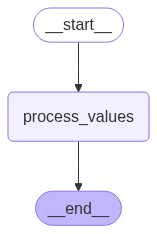

In [13]:
display(Image(app.get_graph().draw_mermaid_png())) 

In [14]:
result = app.invoke({"name":"Neil", "value": [1,2,3,4,5,6,7,8,9,10]})

display(result["result"]) 

'Hi there, Neil! Your sum of values is = 55'

## Agent 2 Graph II : Exercise 

Create a __Graph__ where you pass in a single list of integers along with a name and an 
operation. If the operation is a “+”, you __add__ the elements and if it is a “*”, you 
__multiply__ the elements, __all within the same node.__

__Input:__ {"name": "Neil Sparrow","values": [1,2,3,4] , "operation": "*"}

__Output:__ "Hi Neil Sparrow, your answer is: 24"

*Hint: You need an if-statement in your node!*


In [15]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    operation: str
    result: str 

In [16]:
def process_operation(state: AgentState) -> AgentState:
    """ Simple node that processes a list of values and returns a result based on the operation """
    answer : int = 0
    if state["operation"] == "+":
        answer = sum(state["values"])
    
    elif state["operation"] == "*":
        answer = math.prod(state["values"])
                
    else: 
        answer = 0
           
    
    state["result"] = f"Hi {state["name"]}, You had selected {state["operation"]} operation, and the result is {answer}"
       
    
    return state
    

In [17]:
graph = StateGraph(state_schema=AgentState)  # we create a new graph for the operation processor application

graph.add_node(node="process_operation", action=process_operation)

graph.set_entry_point(key="process_operation")  
graph.set_finish_point(key="process_operation")

app = graph.compile()


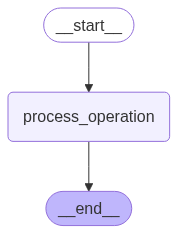

In [18]:
display( Image(app.get_graph().draw_mermaid_png()))  # we display the graph of the operation processor application


In [19]:
# additional 
result : Dict = app.invoke({"name": "Neil Sparrow", "values": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "operation": "+"})
display(result["result"]) 

# Multiplication
result = app.invoke({"name": "Neil Sparrow", "values": [1, 2, 3, 4, 5, 6, 7, 8, 9,10], "operation": "*"})
display(result["result"])

'Hi Neil Sparrow, You had selected + operation, and the result is 55'

'Hi Neil Sparrow, You had selected * operation, and the result is 3628800'

## Agent 3 Graph III : Practice 

In [20]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [21]:
def first_node(state : AgentState) -> AgentState:
    """This is first node for the agent"""
    
    state["final"] =  f"Hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is Second Node for the Agent"""
    
    state['final'] = state['final'] + f" you are {state['age']} years old."    
    return state

In [22]:
graph = StateGraph(state_schema= AgentState)

graph.add_node(node = "first_node", action= first_node)
graph.add_node(node = "second_node", action= second_node)

graph.add_edge(start_key="first_node",end_key="second_node")

graph.set_entry_point( key= "first_node")
graph.set_finish_point(key= "second_node")


app = graph.compile()




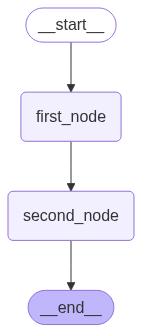

In [23]:
display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
result : Dict = app.invoke(input = {"name":"Charlie","age": 20})

display(result["final"])

'Hi Charlie! you are 20 years old.'

## Agent 3 Graph III : Exercise 

### Our task:

1. Accept a user’s name, age, and a list of their skills.
2. Pass the state through __three nodes__ that:
   * __First node:__ Personalizes the name field with a greeting.
   * __Second node:__ Describes the user’s age.
   * __Third node:__ Lists the user’s skills in a formatted string.
3. The final output in the result field should be a __combined message__ in this format:

__Output:__ "Hi Neil Sparrow, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph"

*Hint: You will need to use the the add_edge method twice*


In [25]:
class AgentState(TypedDict):
    name : str
    age : str
    skills : list[str]
    result : str

In [26]:
def first_node(state : AgentState) -> AgentState:
    """This is first node says hello"""
    
    state["result"] = f"Hi {state["name"]}, Welcome to the system!"
    
    return state


def second_node(state: AgentState) -> AgentState:
    """This is Second node describe user age"""
    state["result"] = state["result"] + f" You are {state["age"]} years old!"
    return state


def third_node(state: AgentState) -> AgentState:
    """This is third node describe user skills"""
    state["result"] = state["result"] + f" You have skills in: {", ".join(state["skills"])}."  
    return state

In [27]:
graph = StateGraph(state_schema = AgentState)

graph.add_node(node = "first_node",action = first_node)
graph.add_node(node = "second_node",action = second_node)
graph.add_node(node = "third_node",action = third_node)

graph.add_edge(start_key = "first_node", end_key = "second_node")
graph.add_edge(start_key = "second_node", end_key = "third_node")

graph.set_entry_point(key = "first_node")
graph.set_finish_point(key = "third_node")

app = graph.compile()


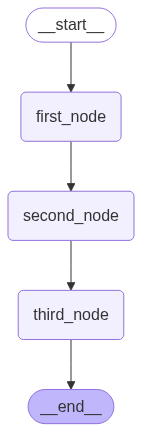

In [28]:
display(Image(app.get_graph().draw_mermaid_png()))  

In [29]:
result : dict = app.invoke(input={"name":"Neil Sparrow","age":30, "skills" : ["Python","Machine Learning","LangGraph"]})

display(result["result"])

'Hi Neil Sparrow, Welcome to the system! You are 30 years old! You have skills in: Python, Machine Learning, LangGraph.'

## Agent 4 Graph IV : Practice 

In [30]:
class AgentState (TypedDict):
    number1 : int
    operation : str
    number2 : int
    final_number : int

In [31]:
def adder(state : AgentState) -> AgentState:
    """This is a adder node to add 2 numbers"""
    state['final_number'] = state['number1'] + state['number2']
    return state

def subtractor(state : AgentState) -> AgentState:
    """This is a subtractor node to subtracts 2 numbers"""
    state['final_number'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    """This node decides what net action is to be taken"""
    
    if state['operation'] == "+":
        return "addition_operation"
    
    elif state['operation'] == "-":
        return "subtraction_operation"
    else:
        return ""
     
    


In [32]:
graph = StateGraph(AgentState)

graph.add_node(node = "add_node", action = adder)
graph.add_node(node = "subtract_node", action = subtractor)

graph.add_node(node = "router", action= lambda state:state) 

graph.add_edge(start_key = START, end_key = "router")

graph.add_conditional_edges(
    source = "router",
    path = decide_next_node,
    path_map = {
        # Edges : Nodes
        "addition_operation" : "add_node",
        "subtraction_operation" : "subtract_node"
    }   
)

graph.add_edge(start_key = "add_node", end_key = END)
graph.add_edge(start_key = "subtract_node", end_key = END)

app = graph.compile()

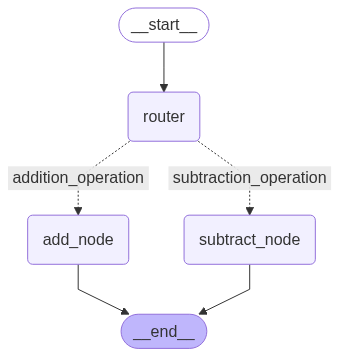

In [33]:
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
initial_stage : dict = {"number1" : 10, "operation" : "+", "number2" : 5}

print(app.invoke(input = initial_stage))


{'number1': 10, 'operation': '+', 'number2': 5, 'final_number': 15}


## Agent 4 Graph IV : Exercise 

Create a __Graph__ where you use two conditional edges. Pass in two set of numbers and an operation, do this twice, i.e for each conditional edge. If the operation one is `+` it does addition if its `-` then it does subtraction. same with the second operation. 

__Input:__ {"number1": 10 ,"number2": 5,"number3": 7,"number4": 2, "operation1": "-" , "operation2": "+"}

__Output:__ "The result for first Operation is 5, and result for second operation is 9"

*Hint: You need 2 routers, where in the first router will do the first operation and pass the state to second router!*


In [35]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    
    result: str

In [36]:
def addition_1(state: AgentState) -> AgentState:
    """This node performs first addition operation"""
    state['result'] = f"The result for first Operation is  {state['number1'] + state['number2']},"
    return state

def subtraction_1(state: AgentState) -> AgentState:
    """This node performs first subtraction operation"""
    state['result'] = f"The result for first Operation is  {state['number1'] - state['number2']},"
    return state

def addition_2(state: AgentState) -> AgentState:
    """This node performs second addition operation"""
    state['result'] = state['result'] + f" and result for second Operation is  {state['number3'] + state['number4']}"
    return state

def subtraction_2(state: AgentState) -> AgentState:
    """This node performs second subtraction operation"""
    state['result'] = state['result'] + f" and result for second Operation is  {state['number3'] - state['number4']}"
    return state

In [37]:
def decide_operation_node_1(state: AgentState) -> str:
    """This node decides what next operation action is to be taken in the first operation stage"""

    if state['operation1'] == "+":
        return "addition_operation"
    
    elif state['operation1'] == "-":
        return "subtraction_operation"

    else:
        return ""

def decide_operation_node_2(state: AgentState) -> str:
    """This node decides what next operation action is to be taken in the second operation stage"""

    if state['operation2'] == "+":
        return "addition_operation"

    elif state['operation2'] == "-":
        return "subtraction_operation"

    else:
        return ""

In [38]:
graph = StateGraph(state_schema=AgentState)

graph.add_node(node="addition_node_1", action=addition_1)
graph.add_node(node="subtraction_node_1", action=subtraction_1)
graph.add_node(node="addition_node_2", action=addition_2)
graph.add_node(node="subtraction_node_2", action=subtraction_2)

graph.add_node(node="router_1", action=lambda state: state)
graph.add_node(node="router_2", action=lambda state: state)

graph.add_edge(start_key=START, end_key="router_1")

graph.add_conditional_edges(
    source="router_1",
    path=decide_operation_node_1,
    path_map={
              # Edges : Nodes
        "addition_operation" : "addition_node_1",
        "subtraction_operation": "subtraction_node_1"
    }
)

graph.add_conditional_edges(
    source="router_2",
    path=decide_operation_node_2,
    path_map={
              # Edges : Nodes
        "addition_operation": "addition_node_2",
        "subtraction_operation": "subtraction_node_2"
    }
)   

graph.add_edge(start_key="addition_node_1", end_key="router_2")
graph.add_edge(start_key="subtraction_node_1", end_key="router_2")

graph.add_edge(start_key="addition_node_2", end_key=END)
graph.add_edge(start_key="subtraction_node_2", end_key=END)

app = graph.compile()


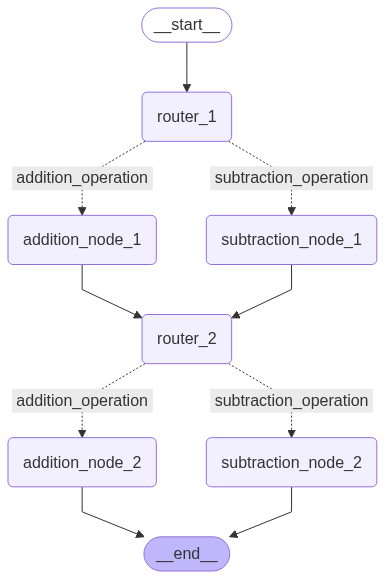

In [39]:
display(Image(app.get_graph().draw_mermaid_png()))      # we display the graph of the multi-stage operation application

In [40]:
initiate_stage =  {"number1": 10 ,"number2": 5,"number3": 7,"number4": 2, "operation1": "-" , "operation2": "+"}

result = app.invoke(input=initiate_stage)
display(result["result"])  # we display the result of the multi-stage operation application

'The result for first Operation is  5, and result for second Operation is  9'

The End 😊 